                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

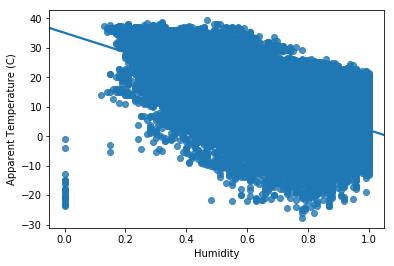

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

df=pd.read_csv("/home/shruti/Downloads/weatherHistory.csv")
print(df.head())

print(df.describe(include=['O']))

print(df.corr())

data_set=df.iloc[:,[0,3,4,5,8]]
print(data_set.corr())

sns.regplot(x=data_set["Humidity"],y=data_set["Apparent Temperature (C)"])


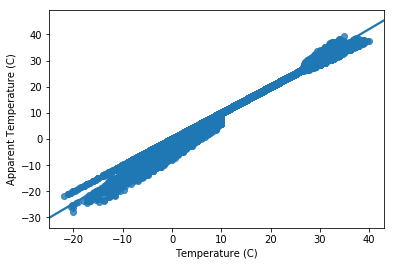

In [4]:
#sns.regplot(x=data_set["Temperature (C)"], y=data_set["Apparent Temperature (C)"])


In [21]:
outliers=[]
def dect_outliers(data_1):
    limit=3
    mean=np.mean(data_1)
    std=np.std(data_1)
    for y in data_1:
        z_score=(y-mean)/std
        if np.abs(z_score)>= limit:
            outliers.append(y)
    return outliers
outlier_data=dect_outliers(data_set["Apparent Temperature (C)"])
print(outlier_data)

[-21.71666666666667, -21.255555555555556, -21.555555555555557, -21.75, -21.922222222222228, -21.399999999999995, -22.09444444444444, -21.777777777777782, -21.97777777777777, -23.7, -23.7, -22.738888888888887, -23.13888888888889, -23.86666666666667, -23.266666666666666, -24.23333333333333, -21.81111111111111, -21.411111111111108, -26.22777777777777, -21.822222222222226, -23.716666666666665, -24.63888888888889, -27.716666666666665, -24.16666666666667, -25.922222222222217, -23.7, -21.66111111111111, -23.027777777777782, -21.9, -22.738888888888887, -22.41666666666667, -23.616666666666664, -23.87222222222222, -24.36666666666667, -21.48333333333333, -22.96666666666667, -22.072222222222226, -25.200000000000006, -25.072222222222226, -21.66111111111111]


In [22]:
final_data_set=data_set[data_set["Apparent Temperature (C)"]>0.15]
print(final_data_set)

                      Formatted Date  Temperature (C)  \
0      2006-04-01 00:00:00.000 +0200         9.472222   
1      2006-04-01 01:00:00.000 +0200         9.355556   
2      2006-04-01 02:00:00.000 +0200         9.377778   
3      2006-04-01 03:00:00.000 +0200         8.288889   
4      2006-04-01 04:00:00.000 +0200         8.755556   
5      2006-04-01 05:00:00.000 +0200         9.222222   
6      2006-04-01 06:00:00.000 +0200         7.733333   
7      2006-04-01 07:00:00.000 +0200         8.772222   
8      2006-04-01 08:00:00.000 +0200        10.822222   
9      2006-04-01 09:00:00.000 +0200        13.772222   
10     2006-04-01 10:00:00.000 +0200        16.016667   
11     2006-04-01 11:00:00.000 +0200        17.144444   
12     2006-04-01 12:00:00.000 +0200        17.800000   
13     2006-04-01 13:00:00.000 +0200        17.333333   
14     2006-04-01 14:00:00.000 +0200        18.877778   
15     2006-04-01 15:00:00.000 +0200        18.911111   
16     2006-04-01 16:00:00.000 

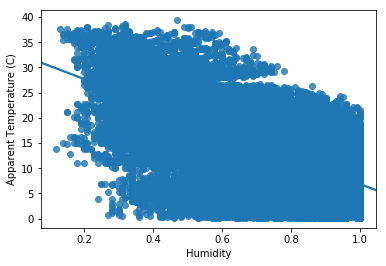

In [23]:
sns.regplot(x=final_data_set["Humidity"],y=final_data_set["Apparent Temperature (C)"])

In [26]:
y=final_data_set.iloc[:,[3]]
print(y)
X=final_data_set.iloc[:,[2]]
print(X)

       Humidity
0          0.89
1          0.86
2          0.89
3          0.83
4          0.83
5          0.85
6          0.95
7          0.89
8          0.82
9          0.72
10         0.67
11         0.54
12         0.55
13         0.51
14         0.47
15         0.46
16         0.60
17         0.63
18         0.69
19         0.70
20         0.77
21         0.76
22         0.79
23         0.77
24         0.62
25         0.66
26         0.80
27         0.79
28         0.82
29         0.83
...         ...
96423      0.32
96424      0.51
96425      0.58
96426      0.64
96427      0.71
96428      0.77
96429      0.81
96430      0.87
96431      0.87
96432      0.87
96433      0.93
96434      0.90
96435      0.93
96436      0.88
96437      0.75
96438      0.65
96439      0.59
96440      0.42
96441      0.37
96442      0.33
96443      0.28
96444      0.28
96445      0.28
96446      0.28
96447      0.32
96448      0.43
96449      0.48
96450      0.56
96451      0.60
96452      0.61

[77977 

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62381, 1)
(15596, 1)
(62381, 1)
(15596, 1)


In [35]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
regressor.coef_


array([[-0.01498419]])

In [37]:
regressor.intercept_

array([0.9244098])

In [39]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[0.85639823]
 [0.49469655]
 [0.71704527]
 ...
 [0.81577442]
 [0.82001994]
 [0.65860693]]


In [43]:
regressor.score(X,y)


0.39064273961626883

In [42]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.15680955684405626


In [44]:
import statsmodels.api as sm
ones_1 =[1] * X.count()
X["b0"]=ones_1

/home/shruti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
model = sm.OLS(y_pred,X_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 2.218e+04
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:59:15   Log-Likelihood:                -10101.
No. Observations:               15596   AIC:                         2.020e+04
Df Residuals:                   15595   BIC:                         2.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Apparent Temperature (C)     0.0332      0.000    148.931      0.000       0.033       0.034
==============================================================================
Omnibus:                     1152.745   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.775
Skew:                          -0.200   Prob(JB):                    5.92e-103
Kurtosis:                       2.249   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""